 #                    TMDB Movies Data - Exploratory Analysis Report

<img src="https://images.unsplash.com/photo-1489599849927-2ee91cede3ba?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="width:100%; height:200px; object-fit:cover;" />

This report explores a movie dataset to draw insights and visualise findings. This report begins by exploring the patterns within the dataset, and then focuses on popularity of films and their genres. 

**The objective** was to gain a deeper understanding of the dataset structure and identify trends to inform future analysis and potential applications like a recommendation system.

>Source: TDMB_movies.csv \
>Size: 4803 records \
>Key Columns:
Title, 
Popularity, 
Genre, 
Revenue, 
Budget

This report is split into the following sections:

- 01: Data Checking and Cleaning
- 02: Initial Exploration of Data
- 03: Detailed analysis of Popularity and Genre
- 04: Conclusions

# 01: Data Checks and Cleaning

<img src="https://images.unsplash.com/photo-1450101499163-c8848c66ca85?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="width:100%; height:200px; object-fit:cover;" />

The purpose of this section is to check the data and look at the following: 
>01.1 - Null values   
>01.2 - Duplicates  
>01.3 - Extract genres column  
>01.4 - Add column for year  
>01.5 - Add column for genre count  
>01.6 - Filter dataframe to only include relevant columns  

Furthermore, columns were added and filtered out for ease of usability of the dataframe for analysis.

In [1343]:
# import packages and load data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # visualisation!
import ast

## Read in the movies dataframe

path="TMDB_movies.csv"
df = pd.read_csv(path)

In [1345]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [1477]:
# Stronger correlations between revenue and budget, popularity and revenue and budget and popularity
df.corr(numeric_only = True)

,id,budget,popularity,revenue,genre_count,vote_average,vote_count
id,1.000000,-0.088963,0.031760,-0.050113,-0.160403,-0.267822,-0.003710
budget,-0.088963,1.000000,0.505364,0.730806,0.268992,0.092644,0.593148
popularity,0.031760,0.505364,1.000000,0.644700,0.154690,0.273990,0.778114
revenue,-0.050113,0.730806,0.644700,1.000000,0.182049,0.197153,0.781475
genre_count,-0.160403,0.268992,0.154690,0.182049,1.000000,0.083449,0.153823
vote_average,-0.267822,0.092644,0.273990,0.197153,0.083449,1.000000,0.313263
vote_count,-0.003710,0.593148,0.778114,0.781475,0.153823,0.313263,1.000000


In [1347]:
# Looking at the number of records and columns
df.shape

(4803, 20)

## 01.1 - Null Values   

In [1350]:
#To look at records that have atleast one null value
df[df.isnull().any(axis=1)]
#There were many records with null values, therefore a count was done in the next line

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-11,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2006-05-24,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""na

In [1352]:
#Checks for count of null values per column
null_df = df.isnull() 
null_df.sum()
# Concluded where majority of the nulls were was not important for the analysis
# Did however drop one record for release_date as there will be an exploration of release_date

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [1354]:
#Drops rows with a null value
df.dropna(
    axis = 0,
    how = 'any', 
    subset = 'release_date',  
    inplace = True 
)

In [1356]:
#Reran to check if the null value did get dropped in release date, which it did.
null_df = df.isnull() 
null_df.sum()

budget                     0
genres                     0
homepage                3090
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  843
title                      0
vote_average               0
vote_count                 0
dtype: int64

 ## 01.2 - Duplicates  

In [1359]:
# Checked and there are no duplicates for id
df[df.id.duplicated()] 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


## 01.3 - Extract Genres Column   

In [1362]:
# This section will extract genres so that we can work with the data
ast.literal_eval(df.genres[0])[0]['name']

def extract_genres(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

In [1364]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"


## 01.4 - Add Column for Year  

In [1367]:
# added column for year
df["release_year"] = df.release_date.str.extract(r"(\d{4})")

## 01.5 - Add Column for Genre Count  

In [1370]:
#added column for genre count
df['genre_count'] = df['extracted_genres'].apply(len)

## 01.6 - Filter Dataframe to only Include Relevant Columns 

In [1373]:
#Only including relevant columns
df = df[['id','title', 'budget','popularity','revenue', 'original_language',
         'release_date', 'status', 'release_year', 'extracted_genres','genre_count',
         'vote_average', 'vote_count']]

In [1375]:
df.head()

,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
0,19995,Avatar,237000000,150.437577,2787965087,en,2009-12-10,Released,2009,"[Action, Adventure, Fantasy, Science Fiction]",4,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,139.082615,961000000,en,2007-05-19,Released,2007,"[Adventure, Fantasy, Action]",3,6.9,4500
2,206647,Spectre,245000000,107.376788,880674609,en,2015-10-26,Released,2015,"[Action, Adventure, Crime]",3,6.3,4466
3,49026,The Dark Knight Rises,250000000,112.312950,1084939099,en,2012-07-16,Released,2012,"[Action, Crime, Drama, Thriller]",4,7.6,9106
4,49529,John Carter,260000000,43.926995,284139100,en,2012-03-07,Released,2012,"[Action, Adventure, Science Fiction]",3,6.1,2124


In [1529]:
df[['id','budget','popularity','revenue',
         'release_date','release_year']].describe()


,id,budget,popularity,revenue
count,4802.000000,4.802000e+03,4802.000000,4.802000e+03
mean,57098.234902,2.905109e+07,21.496776,8.227777e+07
std,88581.302370,4.072447e+07,31.818451,1.628697e+08
min,5.000000,0.000000e+00,0.000372,0.000000e+00
25%,9013.750000,8.000000e+05,4.671734,0.000000e+00
50%,14626.500000,1.500000e+07,12.924931,1.917498e+07
75%,58589.750000,4.000000e+07,28.332017,9.291920e+07
max,459488.000000,3.800000e+08,875.581305,2.787965e+09


# 02: Initial Exploration of Data

<img src="https://images.unsplash.com/photo-1584967918940-a7d51b064268?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="width:100%; height:200px;object-fit:cover;" />

This section explores the data by looking at the following:
>02.1 - Top 10 Films Ordered by Revenue  
>02.2 - Top 10 Films Ordered by Popularity  
>02.3 - Initial Observations  
>02.4 - Top 10 Budget per Year  
>02.5 - Top 10 Revenue per Year  
>02.6 - Film Comparison: Minions vs Deadpool  

## 02.1 - Top 10 Films Ordered by Revenue

In [1380]:
# Top 10 films ordered by revenue
top_10_revenue = df[['title', 'revenue', 'popularity', 'extracted_genres', 'release_year']]\
                .sort_values('revenue', ascending = False)\
                .reset_index(drop=True).head(10)

In [1491]:
top_10_revenue.head(10) #superhero films and pixar films perform extremely well

,title,revenue,popularity,extracted_genres,release_year
0,Avatar,2787965087,150.437577,"[Action, Adventure, Fantasy, Science Fiction]",2009
1,Titanic,1845034188,100.025899,"[Drama, Romance, Thriller]",1997
2,The Avengers,1519557910,144.448633,"[Science Fiction, Action, Adventure]",2012
3,Jurassic World,1513528810,418.708552,"[Action, Adventure, Science Fiction, Thriller]",2015
4,Furious 7,1506249360,102.322217,[Action],2015
5,Avengers: Age of Ultron,1405403694,134.279229,"[Action, Adventure, Science Fiction]",2015
6,Frozen,1274219009,165.125366,"[Animation, Adventure, Family]",2013
7,Iron Man 3,1215439994,77.682080,"[Action, Adventure, Science Fiction]",2013
8,Minions,1156730962,875.581305,"[Family, Animation, Adventure, Comedy]",2015
9,Captain America: Civil War,1153304495,198.372395,"[Adventure, Action, Science Fiction]",2016


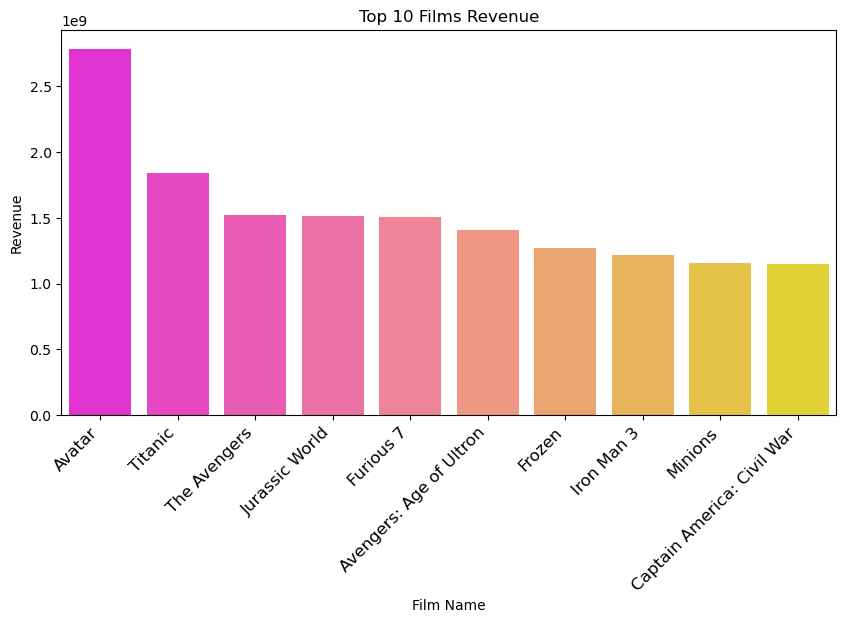

In [1384]:
# Chart for top 10 films with most revenue
plt.figure(figsize = (10,5)) # setting the size of the output



sns.barplot( data = top_10_revenue ,
             x = 'title',
             y = 'revenue',
             palette = 'spring' # setting the colours
           )

plt.xticks( ticks = range(10), # Distance between points
            rotation= 45 , # rotating labels
            horizontalalignment = 'right', # aligning them with the bars
            fontweight = 'light',
            fontsize =  'large' # setting the fonts
          )

plt.xlabel('Film Name')

plt.ylabel('Revenue')

plt.title('Top 10 Films by Revenue') # naming the plot

plt.savefig('plot.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

## 02.2 - Top 10 Films Ordered by Popularity

In [1495]:
# Top 10 films in order of popularity
top_10_popularity = df[['title', 'revenue', 'popularity', 'extracted_genres', 'release_year']]\
                    .sort_values('popularity', ascending = False)\
                    .reset_index(drop=True).head(10)

In [1389]:
top_10_popularity.head(10) 

,title,revenue,popularity,extracted_genres,release_year
0,Minions,1156730962,875.581305,"[Family, Animation, Adventure, Comedy]",2015
1,Interstellar,675120017,724.247784,"[Adventure, Drama, Science Fiction]",2014
2,Deadpool,783112979,514.569956,"[Action, Adventure, Comedy]",2016
3,Guardians of the Galaxy,773328629,481.098624,"[Action, Science Fiction, Adventure]",2014
4,Mad Max: Fury Road,378858340,434.278564,"[Action, Adventure, Science Fiction, Thriller]",2015
5,Jurassic World,1513528810,418.708552,"[Action, Adventure, Science Fiction, Thriller]",2015
6,Pirates of the Caribbean: The Curse of the Bla...,655011224,271.972889,"[Adventure, Fantasy, Action]",2003
7,Dawn of the Planet of the Apes,710644566,243.791743,"[Science Fiction, Action, Drama, Thriller]",2014
8,The Hunger Games: Mockingjay - Part 1,752100229,206.227151,"[Science Fiction, Adventure, Thriller]",2014
9,Big Hero 6,652105443,203.734590,"[Adventure, Family, Animation, Action, Comedy]",2014


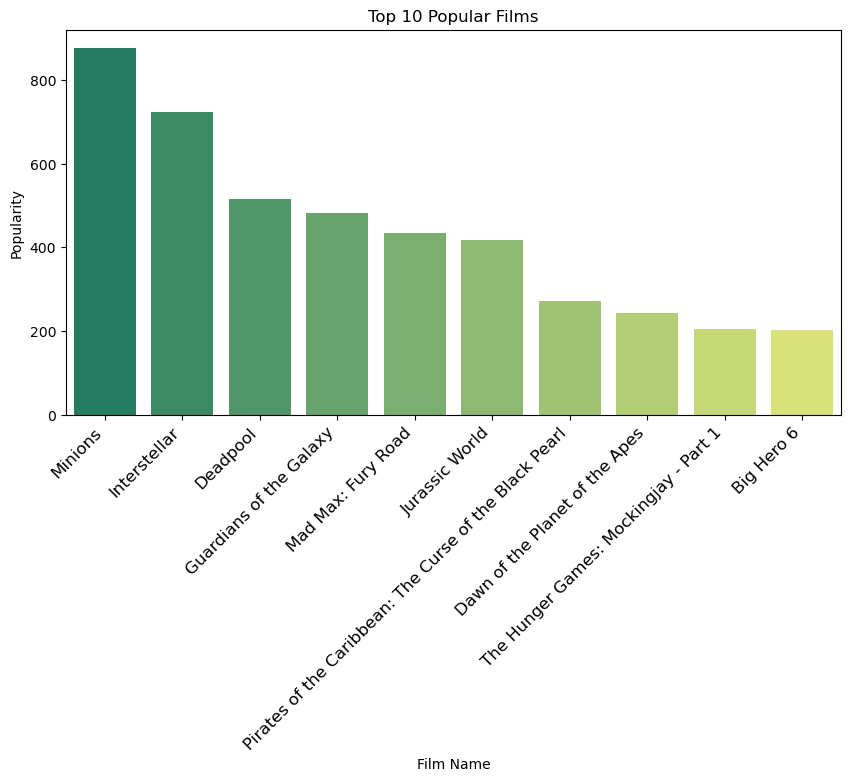

In [1479]:
# Graph for top 10 popular films
plt.figure(figsize = (10,5)) # setting the size of the output



sns.barplot( data = top_10_popularity ,
             x = 'title',
             y = 'popularity',
             palette = 'summer' # setting the colours
           )


plt.xticks( ticks = range(10), # Distance between points
            rotation= 45 , # rotating labels
            horizontalalignment = 'right', # aligning them with the bars
            fontweight = 'light',
            fontsize =  'large' # setting the fonts
          )

plt.xlabel('Film Name')

plt.ylabel('Popularity')

plt.title('Top 10 Popular Films') # naming the plot

plt.savefig('plot.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

## 02.3 - Initial Observations

**Observation 1** - Most popular does not mean highest revenue.  
There is almost no overlap in popularity and revenue as shown below which is surprising as I expected more sales would signal higher popularity.

In [1395]:
top_10_revenue[['title']].compare(top_10_popularity[['title']])
# where self is ordered by revenue and other is ordered by popularity
# source: https://saturncloud.io/blog/how-to-compare-two-pandas-dataframes-for-differences/#:~:text=Comparing%20Dataframes%20using%20compare(),differences%20between%20the%20two%20dataframes.

title  \
                         self   
0                      Avatar   
1                     Titanic   
2                The Avengers   
3              Jurassic World   
4                   Furious 7   
5     Avengers: Age of Ultron   
6                      Frozen   
7                  Iron Man 3   
8                     Minions   
9  Captain America: Civil War   

                                                      
                                               other  
0                                            Minions  
1                                       Interstellar  
2                                           Deadpool  
3                            Guardians of the Galaxy  
4                                 Mad Max: Fury Road  
5                                     Jurassic World  
6  Pirates of the Caribbean: The Curse of the Bla...  
7                     Dawn of the Planet of the Apes  
8              The Hunger Games: Mockingjay - Part 1  
9                                         Big Hero 6

>The **2015 films** are heavily represented in both **popularity and revenue**. 
Therefore, let us explore the years, budget and revenue in more detail.

>The most popular film is **not** the film with the highest vote average as shown below.

In [1398]:
df[df['title'] == 'Minions'] # popularity and average vote are not the same as the most popular 
#film has a lower average vote, see below for highest average vote

,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
546,211672,Minions,74000000,875.581305,1156730962,en,2015-06-17,Released,2015,"[Family, Animation, Adventure, Comedy]",4,6.4,4571


In [1400]:
# Films with the highest average vote counts are very low as shown below
df[df.vote_average == df.vote_average.max()] 

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
3519,89861,Stiff Upper Lips,0,0.356495,0,en,1998-06-12,Released,1998,[Comedy],1,10.0,1
4045,78373,"Dancer, Texas Pop. 81",0,0.376662,565592,en,1998-05-01,Released,1998,"[Comedy, Drama, Family]",3,10.0,1
4247,361505,Me You and Five Bucks,1,0.094105,0,en,2015-07-07,Released,2015,"[Romance, Comedy, Drama]",3,10.0,2
4662,40963,Little Big Top,0,0.092100,0,en,2006-01-01,Rumored,2006,[Comedy],1,10.0,1


>Films with the highest average vote counts are very low as shown above. Even a rumoured film received top votes, and though lower votes can be filtered out, it was decided to focus on the popularity column.

In [1403]:
df.head()

,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
0,19995,Avatar,237000000,150.437577,2787965087,en,2009-12-10,Released,2009,"[Action, Adventure, Fantasy, Science Fiction]",4,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,139.082615,961000000,en,2007-05-19,Released,2007,"[Adventure, Fantasy, Action]",3,6.9,4500
2,206647,Spectre,245000000,107.376788,880674609,en,2015-10-26,Released,2015,"[Action, Adventure, Crime]",3,6.3,4466
3,49026,The Dark Knight Rises,250000000,112.312950,1084939099,en,2012-07-16,Released,2012,"[Action, Crime, Drama, Thriller]",4,7.6,9106
4,49529,John Carter,260000000,43.926995,284139100,en,2012-03-07,Released,2012,"[Action, Adventure, Science Fiction]",3,6.1,2124


>After exploring original language vs average revenue, it was found that there was one language 
above english films that only had one record. 4504 records have english as their original language with much variation in revenue.

## 02.4 - Top 10 Budget per Year

In [1410]:
# using mean
top_10_budget_year= df.groupby('release_year')[['budget']]\
                    .mean().sort_values('budget', ascending=False).head(10)

In [1412]:
top_10_budget_year.head(10)

,budget
release_year,
1927,9.262000e+07
2016,4.570327e+07
2013,3.552329e+07
2012,3.492203e+07
2011,3.477232e+07
2010,3.449541e+07
1997,3.444345e+07
2000,3.285060e+07
2003,3.156176e+07


## 02.5 - Top 10 Revenue per Year

In [1417]:
# using mean
top_10_revenue_year = df.groupby('release_year')[['revenue']]\
                        .mean().sort_values('revenue', ascending = False).head(10)

In [1419]:
top_10_revenue_year.head(10)

,revenue
release_year,
1939,1.478438e+08
2016,1.390496e+08
1942,1.389548e+08
1990,1.332335e+08
2012,1.160659e+08
1992,1.104972e+08
1975,1.090829e+08
1994,1.077955e+08
1973,1.066211e+08


>**Observation 2** - When comparing both top budget and top revenue per year (which have some positive correlation), **2016 is in the top 2 for both tables**. 2015 is not in the top 10 which is interesting.
>Therefore, a comparison will be made with the most popular film in 2016 with the most popular film.

**Picking the top 2016 film which is Deadpool**

In [1423]:
df[df['release_year'] == '2016'].sort_values('popularity', ascending = False).head(20)

,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
788,293660,Deadpool,58000000,514.569956,783112979,en,2016-02-09,Released,2016,"[Action, Adventure, Comedy]",3,7.4,10995
26,271110,Captain America: Civil War,250000000,198.372395,1153304495,en,2016-04-27,Released,2016,"[Adventure, Action, Science Fiction]",3,7.1,7241
9,209112,Batman v Superman: Dawn of Justice,250000000,155.790452,873260194,en,2016-03-23,Released,2016,"[Action, Adventure, Fantasy]",3,5.7,7004
64,246655,X-Men: Apocalypse,178000000,139.272042,543934787,en,2016-05-18,Released,2016,[Science Fiction],1,6.4,4721
78,278927,The Jungle Book,175000000,94.199316,966550600,en,2016-04-07,Released,2016,"[Family, Adventure, Drama, Fantasy]",4,6.7,2892
72,297761,Suicide Squad,175000000,90.237920,745000000,en,2016-08-02,Released,2016,"[Action, Adventure, Crime, Fantasy, Science Fi...",5,5.9,7458
256,262504,Allegiant,110000000,86.105615,179246868,en,2016-03-09,Released,2016,"[Adventure, Science Fiction]",2,5.9,1998
1160,259693,The Conjuring 2,40000000,68.794673,320170008,en,2016-05-13,Released,2016,[Horror],1,7.0,1949
1682,223702,Sausage Party,19000000,66.242737,140752617,en,2016-07-11,Released,2016,"[Adventure, Animation, Comedy, Fantasy]",4,5.6,2238
148,43074,Ghostbusters,144000000,66.218060,229147509,en,2016-07-14,Released,2016,"[Action, Fantasy, Comedy]",3,5.3,2142


## 02.6 - Film Comparison: Minions vs Deadpool

<!-- <img src="https://images.unsplash.com/photo-1593085512500-5d55148d6f0d?q=80&w=2334&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="height:100px" />
<img src="https://images.unsplash.com/photo-1501432377862-3d0432b87a14?q=80&w=3000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="height:100px" /> -->


<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://images.unsplash.com/photo-1593085512500-5d55148d6f0d?q=80&w=2334&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="height:350px; margin-right: 50px;" />
    <p>vs</p>
    <img src="https://images.unsplash.com/photo-1501432377862-3d0432b87a14?q=80&w=3000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="height:350px; margin-left: 50px;" />
</div>

In [1428]:
#Let's have a look back at the top 10 most popular - Deadpool is in the top three
top_10_popularity.head(10)

,title,revenue,popularity,extracted_genres,release_year
0,Minions,1156730962,875.581305,"[Family, Animation, Adventure, Comedy]",2015
1,Interstellar,675120017,724.247784,"[Adventure, Drama, Science Fiction]",2014
2,Deadpool,783112979,514.569956,"[Action, Adventure, Comedy]",2016
3,Guardians of the Galaxy,773328629,481.098624,"[Action, Science Fiction, Adventure]",2014
4,Mad Max: Fury Road,378858340,434.278564,"[Action, Adventure, Science Fiction, Thriller]",2015
5,Jurassic World,1513528810,418.708552,"[Action, Adventure, Science Fiction, Thriller]",2015
6,Pirates of the Caribbean: The Curse of the Bla...,655011224,271.972889,"[Adventure, Fantasy, Action]",2003
7,Dawn of the Planet of the Apes,710644566,243.791743,"[Science Fiction, Action, Drama, Thriller]",2014
8,The Hunger Games: Mockingjay - Part 1,752100229,206.227151,"[Science Fiction, Adventure, Thriller]",2014
9,Big Hero 6,652105443,203.734590,"[Adventure, Family, Animation, Action, Comedy]",2014


In [1430]:
# Filtered for only Minions and Deadpool
df[(df['title'] == 'Minions') | (df['title'] == 'Deadpool')]

,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
546,211672,Minions,74000000,875.581305,1156730962,en,2015-06-17,Released,2015,"[Family, Animation, Adventure, Comedy]",4,6.4,4571
788,293660,Deadpool,58000000,514.569956,783112979,en,2016-02-09,Released,2016,"[Action, Adventure, Comedy]",3,7.4,10995


>Comparing these two records shows that they were released in in a similar time period, with minions being more popular and with a higher revenue. Deadpool had a slightly bigger budget.
The most interesting piece of information is the overlap in their genres which will be explored in the next section.  
Furthermore, when compared to the broader dataset, their popularity is much higher as shown below. These records were intentionally chosen to analyse the characteristics of top-performing films. This could be due to the films being recent releases with good marketing and genre as some genres are known for higher budgets and revenues.

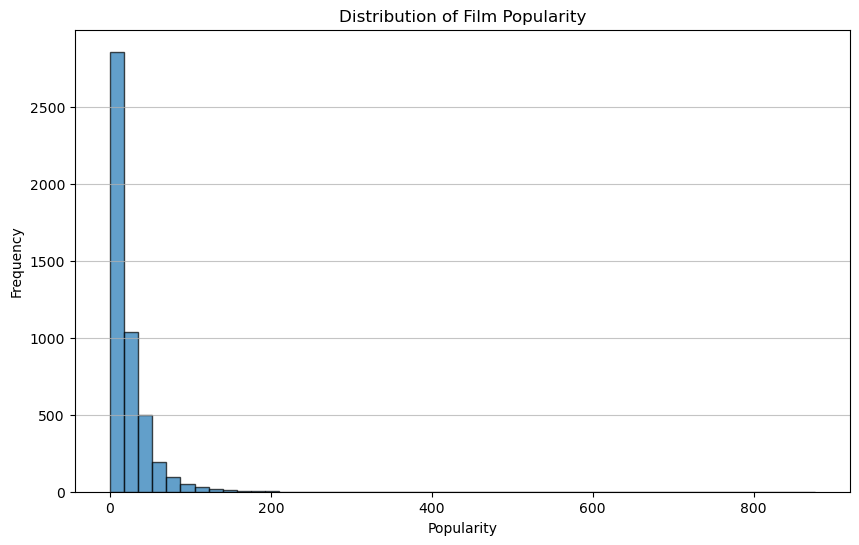

In [1574]:
# Plot the histogram for the 'popularity' column
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Film Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

I picked and ranked by popularity and as shown by the graph, which is not reflective of the general dataset. This is due to the diversity of the broader dataset. Furthermore, there is a vast range of films from different years in the dataset, the disparity of which might be explained by newer films having higher budgets, popularity and revenue. Let us explore genre and popularity.

# 03: Detailed Analysis of Popularity and Genre

<img src="https://images.unsplash.com/photo-1586769852836-bc069f19e1b6?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="width:100%; height:200px;object-fit:cover;" />

This section will explore whether some genres are more popular than others and will go through the following:
>03.1 - Genres Overlap - Comedy and Adventure  
>03.2 - Popularity per Genre  
>03.3 - Exploration of Adventure and Animation  
>03.4 - Top 5 Most Common Genres  

## 03.1 - Genres Overlap - Comedy and Adventure  

In [1436]:
#These are all the similar films to Minions and Deadpool in terms of genre
df_com_adv = df[[('Comedy' in genres) and 
                 ('Adventure' in genres) 
                 for genres in df['extracted_genres']]]

In [1438]:
df_com_adv.sort_values('popularity', ascending = False).head(10)

,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
546,211672,Minions,74000000,875.581305,1156730962,en,2015-06-17,Released,2015,"[Family, Animation, Adventure, Comedy]",4,6.4,4571
788,293660,Deadpool,58000000,514.569956,783112979,en,2016-02-09,Released,2016,"[Action, Adventure, Comedy]",3,7.4,10995
88,177572,Big Hero 6,165000000,203.734590,652105443,en,2014-10-24,Released,2014,"[Adventure, Family, Animation, Action, Comedy]",5,7.8,6135
238,98566,Teenage Mutant Ninja Turtles,125000000,143.350376,477200000,en,2014-08-07,Released,2014,"[Science Fiction, Action, Adventure, Fantasy, ...",5,5.8,2636
55,62177,Brave,185000000,125.114374,538983207,en,2012-06-21,Released,2012,"[Animation, Adventure, Comedy, Family, Action,...",6,6.7,4641
195,181533,Night at the Museum: Secret of the Tomb,127000000,115.597753,349424282,en,2014-12-17,Released,2014,"[Adventure, Comedy, Fantasy, Family]",4,6.1,1851
342,607,Men in Black,90000000,104.121555,589390539,en,1997-07-02,Released,1997,"[Action, Adventure, Comedy, Science Fiction]",4,6.9,4412
160,82702,How to Train Your Dragon 2,145000000,100.213910,609123048,en,2014-06-12,Released,2014,"[Fantasy, Action, Adventure, Animation, Comedy...",6,7.6,3106
631,425,Ice Age,59000000,99.561972,383257136,en,2002-03-10,Released,2002,"[Animation, Comedy, Family, Adventure]",4,7.1,3857
1695,812,Aladdin,28000000,92.982009,504050219,en,1992-11-25,Released,1992,"[Animation, Family, Comedy, Adventure, Fantasy...",6,7.4,3416


>The films above are all fairly popular, released at different years and they have all made more revenue than their budget.

## 03.2 - Popularity per Genre  

In [1442]:
#This section shows the average popularity for each genre

# This code creates a DataFrame for genres and ratings
exploded_df_popularity = df.explode('extracted_genres')

# Calculate the average rating for each genre
average_popularity = exploded_df_popularity.groupby('extracted_genres')[['popularity']]\
                    .mean().sort_values('popularity', ascending = False).reset_index().head(10)


In [1444]:
#Top 10 popular genres
average_popularity.head(10)


,extracted_genres,popularity
0,Adventure,39.268042
1,Animation,38.813439
2,Science Fiction,36.451806
3,Fantasy,36.387043
4,Action,30.940382
5,Family,27.832849
6,Mystery,24.586827
7,Thriller,24.460077
8,War,23.777289
9,Crime,22.853274


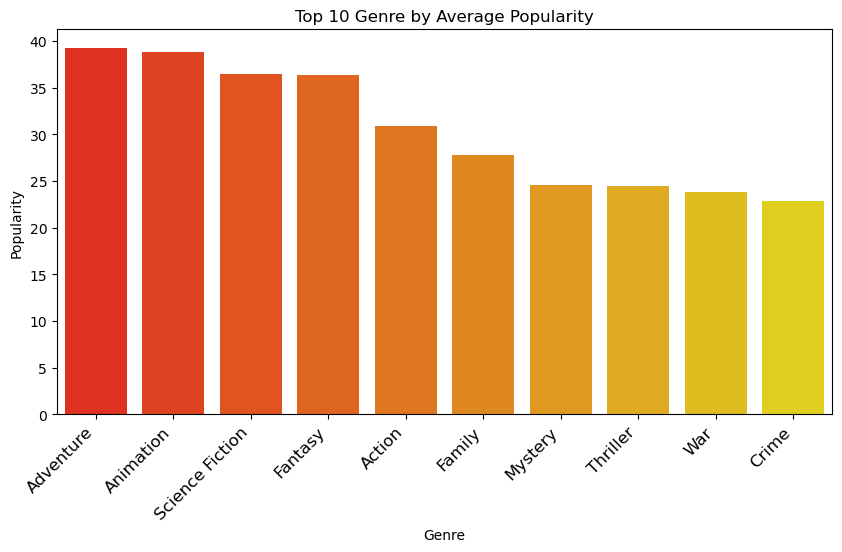

In [1446]:
# Graph for top 10 genre by average popularity
plt.figure(figsize = (10,5)) # setting the size of the output



sns.barplot( data = average_popularity ,
             x = 'extracted_genres',
             y = 'popularity',
             palette = 'autumn' # setting the colours
           )


plt.xticks( ticks = range(10), # Distance between points
            rotation= 45 , # rotating labels
            horizontalalignment = 'right', # aligning them with the bars
            fontweight = 'light',
            fontsize =  'large' # setting the fonts
          )

plt.xlabel('Genre')

plt.ylabel('Popularity')

plt.title('Top 10 Genre by Average Popularity') # naming the plot

plt.savefig('plot.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

>**Observation 3** - Adventure is a genre in nearly every film in the top 10 most popular films and top 10 revenue films.  
>The fact that minions is an animated film could explain its popularity, let us explore top 10 animated films

In [1449]:
exploded_df_popularity[exploded_df_popularity['extracted_genres'] == 'Animation']\
                    .sort_values('popularity', ascending = False).head(10)

,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
546,211672,Minions,74000000,875.581305,1156730962,en,2015-06-17,Released,2015,Animation,4,6.4,4571
88,177572,Big Hero 6,165000000,203.734590,652105443,en,2014-10-24,Released,2014,Animation,5,7.8,6135
124,109445,Frozen,150000000,165.125366,1274219009,en,2013-11-27,Released,2013,Animation,3,7.3,5295
506,93456,Despicable Me 2,76000000,136.886704,970761885,en,2013-06-25,Released,2013,Animation,3,7.0,4637
77,150540,Inside Out,175000000,128.655964,857611174,en,2015-06-09,Released,2015,Animation,4,8.0,6560
55,62177,Brave,185000000,125.114374,538983207,en,2012-06-21,Released,2012,Animation,6,6.7,4641
2294,129,Spirited Away,15000000,118.968562,274925095,ja,2001-07-20,Released,2001,Animation,4,8.3,3840
614,20352,Despicable Me,69000000,113.858273,543513985,en,2010-07-08,Released,2010,Animation,2,7.1,6478
231,585,"Monsters, Inc.",115000000,106.815545,562816256,en,2001-11-01,Released,2001,Animation,3,7.5,5996
160,82702,How to Train Your Dragon 2,145000000,100.213910,609123048,en,2014-06-12,Released,2014,Animation,6,7.6,3106


>The top 10 animated films seem to be making way more revenue than their respective budgets and are decently popular.  
>Lets further look at films that have **adventure and animation** as their genres as they are top two genres on average.

## 03.3 - Exploration of Adventure and Animation

In [1453]:
# Filters for animation and adventure films
df_ani_adv = df[[('Animation' in genres) and 
                 ('Adventure' in genres) 
                 for genres in df['extracted_genres']]]
# source: https://www.programiz.com/python-programming/list-comprehension

In [1455]:
df_ani_adv.shape
# 114 films both animation and adventure

(114, 13)

In [1457]:
# Ordering top 10
df_ani_adv.sort_values('popularity', ascending = False).head(10)

,id,title,budget,popularity,revenue,original_language,release_date,status,release_year,extracted_genres,genre_count,vote_average,vote_count
546,211672,Minions,74000000,875.581305,1156730962,en,2015-06-17,Released,2015,"[Family, Animation, Adventure, Comedy]",4,6.4,4571
88,177572,Big Hero 6,165000000,203.734590,652105443,en,2014-10-24,Released,2014,"[Adventure, Family, Animation, Action, Comedy]",5,7.8,6135
124,109445,Frozen,150000000,165.125366,1274219009,en,2013-11-27,Released,2013,"[Animation, Adventure, Family]",3,7.3,5295
55,62177,Brave,185000000,125.114374,538983207,en,2012-06-21,Released,2012,"[Animation, Adventure, Comedy, Family, Action,...",6,6.7,4641
2294,129,Spirited Away,15000000,118.968562,274925095,ja,2001-07-20,Released,2001,"[Fantasy, Adventure, Animation, Family]",4,8.3,3840
160,82702,How to Train Your Dragon 2,145000000,100.213910,609123048,en,2014-06-12,Released,2014,"[Fantasy, Action, Adventure, Animation, Comedy...",6,7.6,3106
631,425,Ice Age,59000000,99.561972,383257136,en,2002-03-10,Released,2002,"[Animation, Comedy, Family, Adventure]",4,7.1,3857
1695,812,Aladdin,28000000,92.982009,504050219,en,1992-11-25,Released,1992,"[Animation, Family, Comedy, Adventure, Fantasy...",6,7.4,3416
66,14160,Up,175000000,92.201962,735099082,en,2009-05-13,Released,2009,"[Animation, Comedy, Family, Adventure]",4,7.7,6870
190,17578,The Adventures of Tintin,130000000,89.938296,371940071,en,2011-10-25,Released,2011,"[Adventure, Animation, Mystery]",3,6.7,2061


>They are high revenue films with good popularity, minions seems extremely popular in comparison, majority were released in the 2010s.

## 03.4 - Top 10 Most Common Genres  

In [1463]:
# Extracting genres from list
df_exploded_genres = df.explode('extracted_genres')
# Creating count per genre
top_10_genres = df_exploded_genres.groupby('extracted_genres')[['title']]\
                                  .count().sort_values('title', ascending=False)\
                                  .head(10).reset_index()

In [1465]:
top_10_genres.head(10) # Created to look at top 10 genres

,extracted_genres,title
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


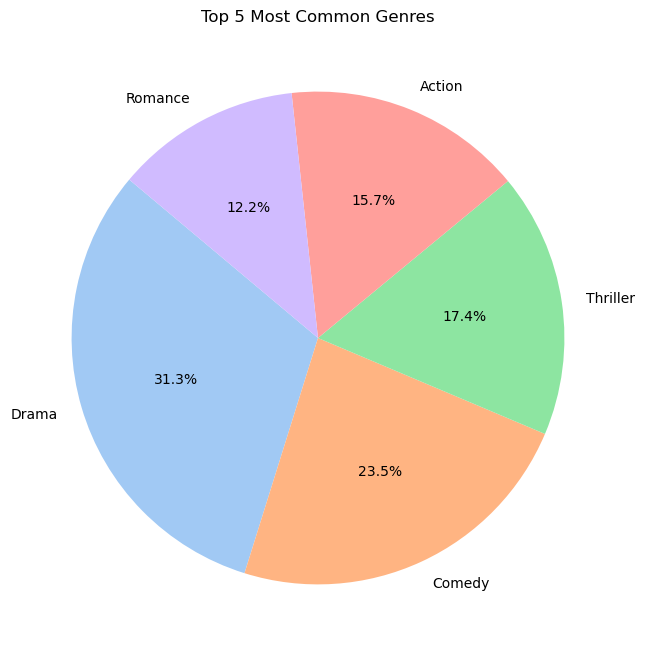

In [1467]:
# Top 5 most common genre
# gets top 5 genres
top_5 = df_exploded_genres['extracted_genres'].value_counts().nlargest(5)
# source: https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(8, 8)) 

plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140, colors= colors)

plt.title('Top 5 Most Common Genres')

plt.show()
#source: https://www.statology.org/seaborn-pie-chart/

 >**Observation 4** - Most common does not mean most popular as drama is the most common but not even in the top 10 of most popular films.  
This could explain disparity in popularity across the dataset as perhaps films with Action, Animation and Adventure in them are more popular.

# 04: Conclusions

<img src="https://images.unsplash.com/photo-1512314889357-e157c22f938d?q=80&w=2942&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="width:100%; height:200px;object-fit:cover;" />

Summary of the observations:
- **Observation 1**: The most popular does not mean highest revenue. There is almost no overlap of films in popularity and revenue which is surprising as it is expected more tickets sold would signal some sort of popularity.  

- **Observation 2** - When comparing both top budget and top revenue per year (which have some positive correlation), 2016 is in the top 2 for both tables. 2015 is not in the top 10 which is interesting.

- **Observation 3** - Adventure is a genre in nearly every film in the top 10 most popular films and top 10 films by revenue.

- **Observation 4** - Most common does not mean most popular as drama is the most common genre but not even in the top 10 of most popular.  

The data exploration started with the the top 10 films in terms of revenue and popularity, it found that 2015 films were heavily represented in those charts with the most popular film being Minions.  
The budget and revenue was then explored where surprisingly 2015 was not even in the top 10, however 2016 was in the top for both so the most popular film was picked for the analysis.
Then, the two films were compared and a similarity was found, which was some of their genres. The effects of genre on popularity was explored where adventure was the most popular genre.  Lastly, most common does not mean most popular, and when a comparison was made it was found that drama was the most common but not in the top 10 most popular.  

To conclude, this is a good starting point for further analysis to be made between the popularity of genres and films where more interesting insights could be found. Further exploration could include taking samples from this dataset and exploring what combination of genres is most popular. An exploration of other factors that determine popularity and revenue could also be explored like production company as the top 10 by revenue and by popularity contain superhero and animated films (interesting to explore the effect of directors and studios like Marvel and Pixar).